In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt

In [ ]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=0, keepdims=True)

In [ ]:
class NN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize basic stats of NN
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

        # Initialize activations and gradients
        self.A0 = None
        self.Z1 = None
        self.A1 = None
        self.Z2 = None
        self.A2 = None
        self.dW2 = None
        self.db2 = None
        self.dW1 = None
        self.db1 = None

    def forward_propagation(self, X):
        self.A0 = X
        self.Z1 = np.dot(self.W1, self.A0.T) + self.b1
        self.A1 = ReLU(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def one_hot(self, y):
        one_hot_y = np.zeros((y.size, self.output_size))
        one_hot_y[np.arange(y.size), y] = 1
        return one_hot_y.T

    def backward_propagation(self, X, y):
        m = X.shape[1]
        one_hot_y = self.one_hot(y)

        self.dZ2 = self.A2 - one_hot_y
        self.dW2 = (1 / m) * np.dot(self.dZ2, self.A1.T)
        self.db2 = (1 / m) * np.sum(self.dZ2, axis=1, keepdims=True)

        self.dA1 = np.dot(self.W2.T, self.dZ2)
        self.dZ1 = self.dA1 * (self.Z1 > 0)
        self.dW1 = (1 / m) * np.dot(self.dZ1, self.A0)
        self.db1 = (1 / m) * np.sum(self.dZ1, axis=1, keepdims=True)

    def update_params(self):
      self.W1 -= self.learning_rate * self.dW1
      self.b1 -= self.learning_rate * self.db1
      self.W2 -= self.learning_rate * self.dW2
      self.b2 -= self.learning_rate * self.db2

    def get_predictions(self,A2):
        return np.argmax(A2, axis=0)

    def get_accuracy(self, X, y):
        predictions = self.get_predictions(self.forward_propagation(X))
        return np.mean(predictions == y)

    def gradient_descent(self, X, y, iters=1000):
        for i in range(iters):
            self.forward_propagation(X)
            self.backward_propagation(X, y)
            self.update_params()
            if i % 100 == 0:
                print(f"Iteration {i} - Accuracy: {self.get_accuracy(X, y):.4f}")

    def show_predictions(self, X, y, num_samples=10):
        random_indices = np.random.randint(0, X.shape[0], size=num_samples)

        for index in random_indices:
            sample_image = X[index, :].reshape((28, 28))
            plt.imshow(sample_image, cmap='gray')
            plt.title(f"Actual: {y[index]}, Predicted: {self.get_predictions(self.forward_propagation(X))[index]}")
            plt.show()

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

miu = np.mean(X_train, axis=(0, 1), keepdims=True)
stds = np.std(X_train, axis=(0, 1), keepdims=True)

mius = np.mean(X_test, axis=(0, 1), keepdims=True)
stdse = np.std(X_test, axis=(0, 1), keepdims=True)

X_normal_train = (X_train - miu) / (stds + 1e-7)
X_normal_test = (X_test - mius) / (stdse + 1e-7)

X_normal_train = X_normal_train.reshape((60000, -1))
X_normal_test = X_normal_test.reshape((10000, -1))

Iteration 0 - Accuracy: 0.5329
Iteration 100 - Accuracy: 0.9570
Iteration 200 - Accuracy: 0.9731
Iteration 300 - Accuracy: 0.9809
Iteration 400 - Accuracy: 0.9861
Iteration 500 - Accuracy: 0.9895
Iteration 600 - Accuracy: 0.9922
Iteration 700 - Accuracy: 0.9941
Iteration 800 - Accuracy: 0.9958
Iteration 900 - Accuracy: 0.9965
Test Accuracy: 0.9760


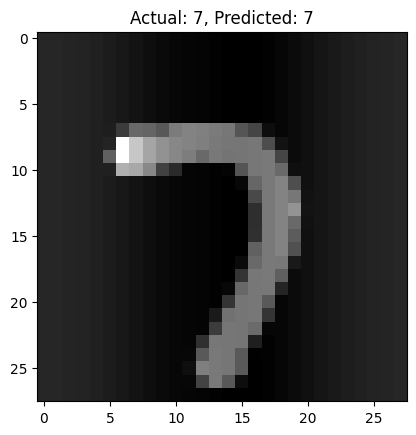

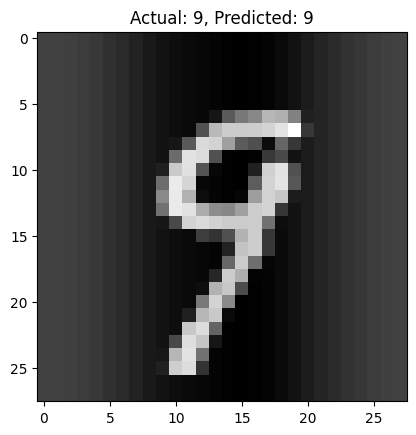

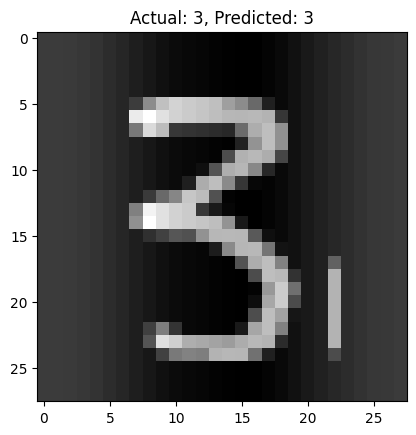

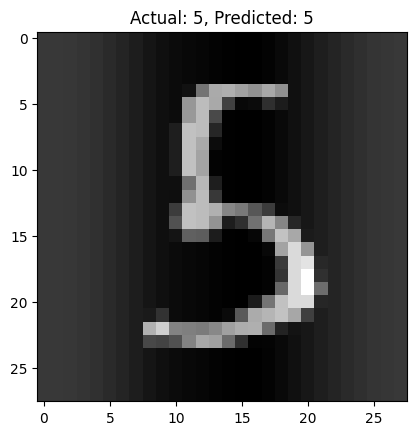

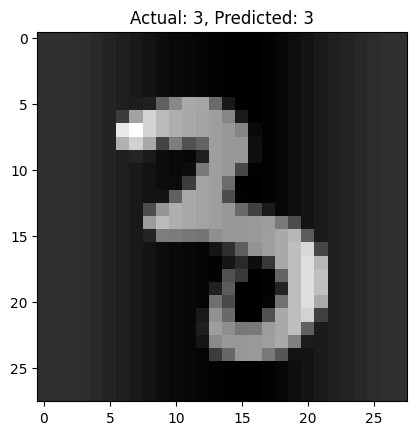

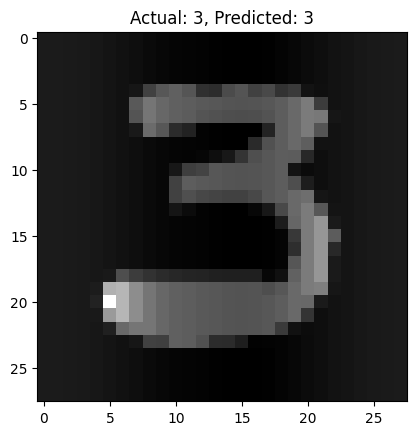

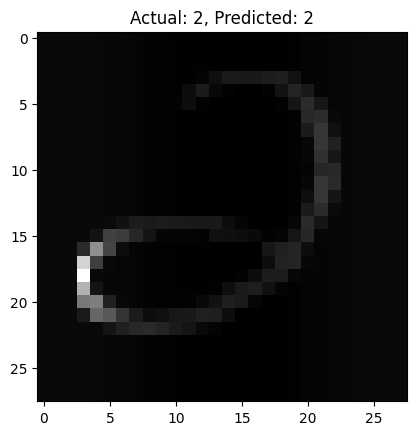

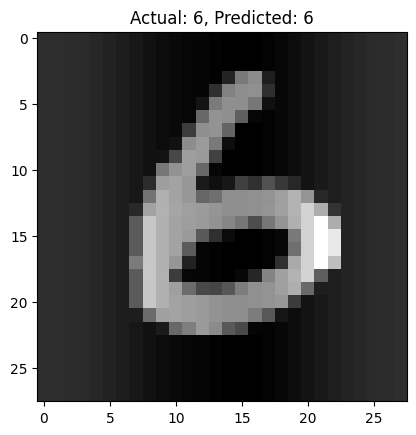

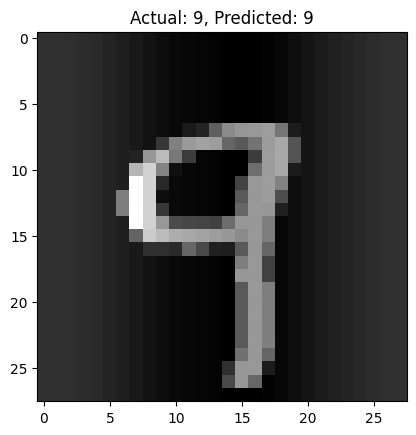

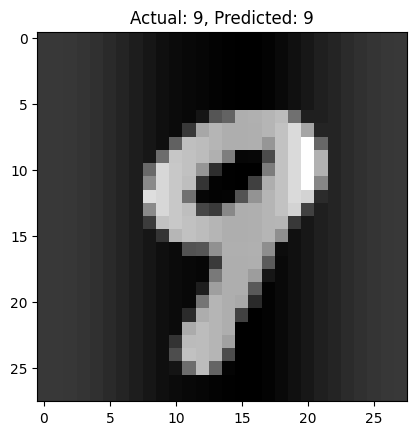

In [62]:
nn = NN(input_size=784, hidden_size=128, output_size=10, learning_rate=0.01)
nn.gradient_descent(X_normal_train, Y_train, iters=1000)

test_accuracy = nn.get_accuracy(X_normal_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

nn.show_predictions(X_normal_test, Y_test, num_samples=10)